# INFO:
### Autores:
- Óscar Muñoz Hidalgo
- Juan José Quesada Acosta
### Fecha última modificación:
- 3-10-2023, 13:30

## Librerías a importar:

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

## Canny

### Canny: 
Conteo píxeles blancos por columna

(0.0, 512.0)

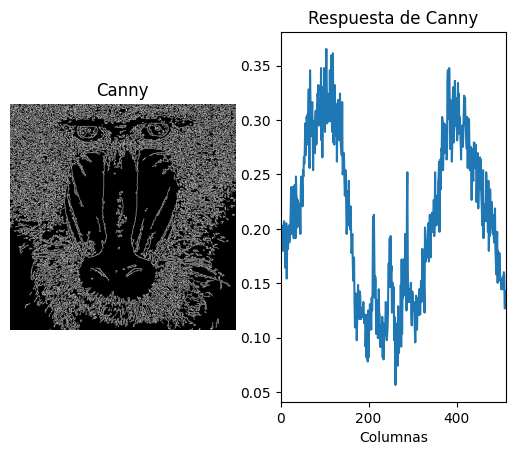

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('mandril.jpg')
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

canny = cv2.Canny(gris, 100, 200)
#El contenido de la imagen resultado de Canny, son valores 0 o 255, lo compruebas al descomentar
#print(canny)
#Cuenta el número de píxeles blancos (255) por columna
#Suma los valores de los pixeles por columna
col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de filas y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
cols = col_counts[0] / (255 * canny.shape[1])

#print(cols)

#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols)
#Rango en x definido por las columnas
plt.xlim([0, canny.shape[0]])

TAREA: Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el máximo para filas y columnas (uno para cada) y muestra el número de filas con un número de píxeles blancos mayor o igual que 0.95*máximo.


### Canny: 
Conteo píxeles blancos por fila

(0.0, 512.0)

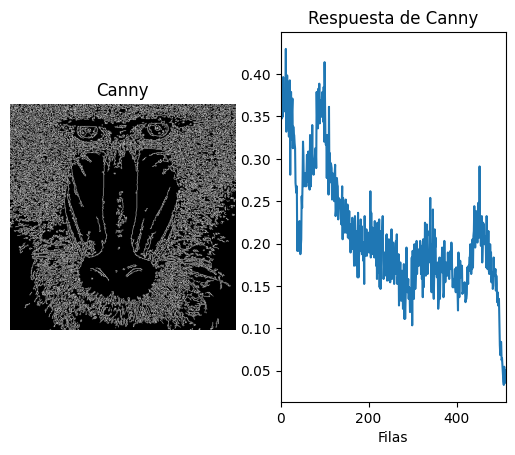

In [2]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('mandril.jpg')
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

canny = cv2.Canny(gris, 100, 200)

col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de filas y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
cols = col_counts[0] / (255 * canny.shape[1])


# Cuenta el número de píxeles blancos (255) por fila
# Suma los valores de los píxeles por fila
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)


# Normaliza en base al número de columnas y al valor máximo del píxel (255)
# El resultado será el número de píxeles blancos por fila
rows = row_counts[:, 0] / (255 * canny.shape[0])

# Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)
# Rango en x definido por las filas
plt.xlim([0, canny.shape[0]])

### Canny: 
Identificación de máximos en columnas y filas

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('mandril.jpg')

gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

canny = cv2.Canny(gris, 100, 200)

col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
cols = col_counts[0] / (255 * canny.shape[1])
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
rows = row_counts[:, 0] / (255 * canny.shape[0])

threshold = 0.95

max_col_value = np.max(cols)
print(max_col_value)
cols_over_threshold = []
for i in range(len(cols)):
    if cols[i] >= threshold*max_col_value:
        cols_over_threshold.append(i)
print(cols_over_threshold)
print

max_row_value = np.max(rows)
print(max_row_value)
rows_over_threshold = []
for i in range(len(rows)):
    if rows[i] >= threshold*max_row_value:
        rows_over_threshold.append(i)
print(rows_over_threshold)

0.365234375
[92, 99, 104, 115, 119, 383]
0.4296875
[12, 100]


## Sobel

### Sobel: 
Conteo píxeles blancos por columna

(0.0, 512.0)

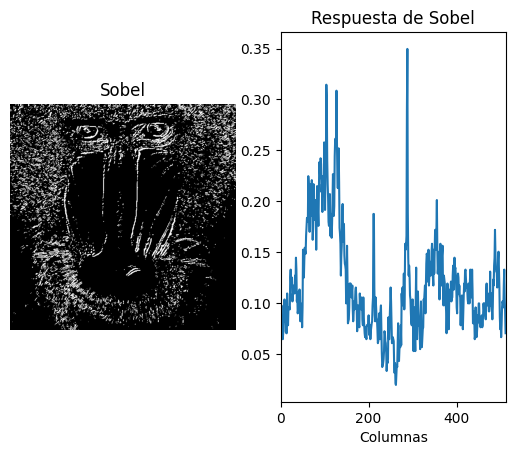

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('mandril.jpg')
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Gaussiana para suavizar la imagen original, eliminando altas frecuencias
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)
#Define valor umbral
valorUmbral = 130 #Prueba otros valores
#Obtiene imagen umbralizada para dicho valor definido
res, imagenUmbralizada = cv2.threshold(cv2.convertScaleAbs(sobel), valorUmbral, 255, cv2.THRESH_BINARY)


#Cuenta el número de píxeles blancos (255) por columna
#Suma los valores de los pixeles por columna
col_counts = cv2.reduce(imagenUmbralizada, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de filas y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
cols = col_counts[0] / (255 * imagenUmbralizada.shape[1])

row_counts = cv2.reduce(imagenUmbralizada, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)


# Normaliza en base al número de columnas y al valor máximo del píxel (255)
# El resultado será el número de píxeles blancos por fila
rows = row_counts[:, 0] / (255 * imagenUmbralizada.shape[0])
#print(cols)

#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Sobel")
plt.imshow(imagenUmbralizada, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Sobel")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols)
#Rango en x definido por las columnas
plt.xlim([0, imagenUmbralizada.shape[0]])

TAREA: Aplica umbralizado a la imagen resultante de Sobel (convertida a 8 bits), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos. Calcula el valor máximo de la cuenta por filas y columnas, y determina las filas y columnas por encima del 0.95*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen. ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

### Sobel: 
Conteo píxeles blancos por fila

(0.0, 512.0)

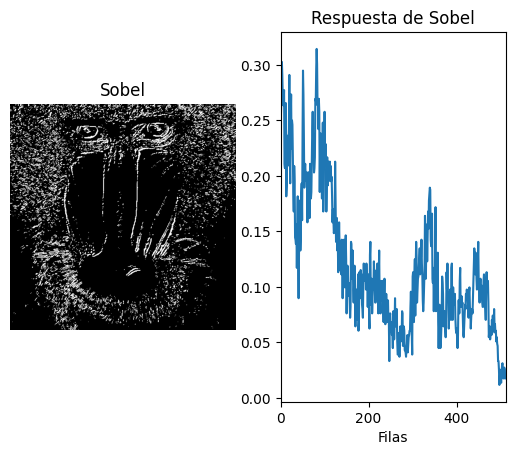

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('mandril.jpg')
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Gaussiana para suavizar la imagen original, eliminando altas frecuencias
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)
#Define valor umbral
valorUmbral = 130 #Prueba otros valores
#Obtiene imagen umbralizada para dicho valor definido
res, imagenUmbralizada = cv2.threshold(cv2.convertScaleAbs(sobel), valorUmbral, 255, cv2.THRESH_BINARY)

# Cuenta el número de píxeles blancos (255) por fila
# Suma los valores de los píxeles por fila
row_counts = cv2.reduce(imagenUmbralizada, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)


# Normaliza en base al número de columnas y al valor máximo del píxel (255)
# El resultado será el número de píxeles blancos por fila
rows = row_counts[:, 0] / (255 * imagenUmbralizada.shape[0])

# Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Sobel")
plt.imshow(imagenUmbralizada, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Sobel")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)
# Rango en x definido por las filas
plt.xlim([0, imagenUmbralizada.shape[0]])

### Sobel: 
Identificación de máximos en columnas y filas

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('mandril.jpg')
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

# Sobel
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
sobel = cv2.add(sobelx, sobely)

valorUmbral = 130 
res, imagenUmbralizada = cv2.threshold(cv2.convertScaleAbs(sobel), valorUmbral, 255, cv2.THRESH_BINARY)

col_counts = cv2.reduce(imagenUmbralizada, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
cols = col_counts[0] / (255 * imagenUmbralizada.shape[1])

row_counts = cv2.reduce(imagenUmbralizada, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
rows = row_counts[:, 0] / (255 * imagenUmbralizada.shape[0])

threshold = 0.95

sobel_max_col_value = np.max(cols)
print(sobel_max_col_value)
sobel_cols_over_threshold = []
for i in range(len(cols)):
    if cols[i] >= threshold*sobel_max_col_value:
        sobel_cols_over_threshold.append(i)
print(sobel_cols_over_threshold)
print

sobel_max_row_value = np.max(rows)
print(sobel_max_row_value)
sobel_rows_over_threshold = []
for i in range(len(rows)):
    if rows[i] >= threshold*sobel_max_row_value:
        sobel_rows_over_threshold.append(i)
print(sobel_rows_over_threshold)

0.349609375
[288]
0.314453125
[3, 82, 83]


## Comparación Canny vs Sobel

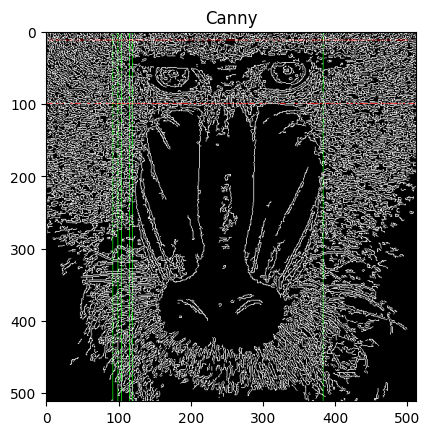

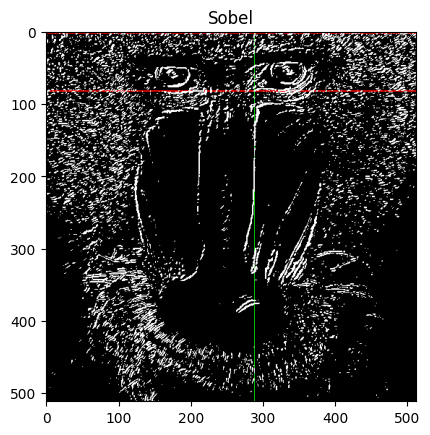

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('mandril.jpg')
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

# Canny
canny = cv2.Canny(gris, 100, 200)

col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
cols = col_counts[0] / (255 * canny.shape[1])
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
rows = row_counts[:, 0] / (255 * canny.shape[0])

threshold = 0.95

max_col_value = np.max(cols)
cols_over_threshold = []
for i in range(len(cols)):
    if cols[i] >= threshold*max_col_value:
        cols_over_threshold.append(i)

max_row_value = np.max(rows)
rows_over_threshold = []
for i in range(len(rows)):
    if rows[i] >= threshold*max_row_value:
        rows_over_threshold.append(i)

# Sobel
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
sobel = cv2.add(sobelx, sobely)

valorUmbral = 130 
res, imagenUmbralizada = cv2.threshold(cv2.convertScaleAbs(sobel), valorUmbral, 255, cv2.THRESH_BINARY)

col_counts = cv2.reduce(imagenUmbralizada, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
cols = col_counts[0] / (255 * imagenUmbralizada.shape[1])

row_counts = cv2.reduce(imagenUmbralizada, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
rows = row_counts[:, 0] / (255 * imagenUmbralizada.shape[0])

threshold = 0.95

sobel_max_col_value = np.max(cols)
sobel_cols_over_threshold = []
for i in range(len(cols)):
    if cols[i] >= threshold*sobel_max_col_value:
        sobel_cols_over_threshold.append(i)

sobel_max_row_value = np.max(rows)
sobel_rows_over_threshold = []
for i in range(len(rows)):
    if rows[i] >= threshold*sobel_max_row_value:
        sobel_rows_over_threshold.append(i)

# Impresión canny
canny_copy = cv2.cvtColor(canny, cv2.COLOR_GRAY2RGB)
for col in cols_over_threshold:
    canny_copy[:, col, 1] = 255
for row in rows_over_threshold:
    canny_copy[row, :, 0] = 255
plt.figure()
plt.imshow(canny_copy)
plt.title("Canny")
plt.show()

#Impresión Sobel
sobel_copy = imagenUmbralizada.copy()
sobel_copy = cv2.cvtColor(sobel_copy, cv2.COLOR_GRAY2RGB)
sobel_copy[:, sobel_cols_over_threshold[0], 1] = 255
for row in sobel_rows_over_threshold:
    sobel_copy[row, :, 0] = 255
plt.figure()
plt.imshow(sobel_copy)
plt.title("Sobel")
plt.show()

TAREA: Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura :). Es por ello que además de poder mostrar la imagen original de la webcam, incluya al menos dos usos diferentes de aplicar las funciones de OpenCV trabajadas hasta ahora.

## Selección de efectos de video

In [2]:
import cv2
import numpy as np

# Inicializar la captura de video
vid = cv2.VideoCapture(0)

# Variable para almacenar el modo actual
mode = 0

disponible = 0
past_frame = None

# Definir la función de callback para manejar los eventos del ratón
def mouse_callback(event, x, y, flags, param):
    global mode, past_frame
    if event == cv2.EVENT_LBUTTONDOWN:
        mode = (mode + 1) % 4  # Cambiar el modo al hacer clic izquierdo

def demoMode(frame, mode):
    
    if mode == 0:
        effect_frame = frame  # Sin efecto
        effect_name = "Sin efecto"
    elif mode == 1:
        effect_frame = cv2.Canny(frame, 50, 200)  # Efecto Canny
        effect_frame = cv2.cvtColor(effect_frame, cv2.COLOR_GRAY2BGR)  # Convertir a BGR para mostrar
        effect_name = "Contornos"
    elif mode == 2:
        global disponible, past_frame
        if disponible == 0:
            display_frame = frame
            disponible = 1
        else:
            display_frame = cv2.absdiff(past_frame, frame)

        past_frame = frame

        effect_frame = display_frame
        effect_name = "Diferencia"
    elif mode == 3:
        frame_grey_scale = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        min_value,max_value,min_coords,max_coords = cv2.minMaxLoc(frame_grey_scale)

        cv2.circle(frame,(min_coords), 7, (0,0,255), 2)
        cv2.circle(frame,(max_coords), 7, (255,0,0), 2)
        effect_frame = frame
        effect_name = "Min y Max"
    return effect_frame, effect_name

# Asignar la función de callback a la ventana
cv2.namedWindow("Demo")
cv2.setMouseCallback("Demo", mouse_callback)

while(True):
    ret, frame = vid.read()
    
    if not ret:
        break

    # Cambiar el modo al presionar la tecla de espacio
    key = cv2.waitKey(20)
    if key == 27:  # Tecla 'Esc' para salir
        break
    elif key == 32:  # Tecla de espacio para cambiar el modo
        mode = (mode + 1) % 4

    # Aplicar el efecto correspondiente según el modo actual
    effect_frame, effect_name = demoMode(frame, mode)


    # Crear un recuadro de texto con fondo blanco
    text_box = np.ones((100, frame.shape[1], 3), dtype=np.uint8) * 255
    text = f"Efecto: {effect_name}"
    instructions = "Para cambiar el efecto, haz click izquierdo o pulsa la tecla 'Espacio'"
    cv2.putText(text_box, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2, cv2.LINE_AA)
    cv2.putText(text_box, instructions, (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)

    # Concatenar la imagen de la cámara con el recuadro de texto
    combined = np.vstack((effect_frame, text_box))

    # Mostrar la imagen combinada
    cv2.imshow("Demo", combined)

vid.release()
cv2.destroyAllWindows()

TAREA: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) proponer un demostrador reinterpretando la parte de procesamiento de la imagen, tomando como punto de partida alguna de dichas instalaciones.

## Detección de zonas azules y contornos + Overlay anfibio espacial 

In [3]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

# Colores en HSV de la máscara azul que se desea detectar
lower_limit = (1, 50, 50)
upper_limit = (40, 255, 255)

# Captura de video de la cámara y del video de fondo
vid = cv2.VideoCapture(0)
overlay_background_video = cv2.VideoCapture('./Assets/EspacioFondo.mp4')

# Obtenemos las dimensiones de la webcam para redimensionar el video de fondo
webcam_width = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
webcam_height = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Variable para gestionar la sustitución del video de fondo
current_video = './Assets/EspacioFondo.mp4'
triangle_detected = False
frames_since_last_triangle = 0

# Límite de fotogramas sin detectar triángulos
NO_TRIANGLE_FRAME_LIMIT = 100

while True:

    # Leemos el frame de la webcam
    ret, frame = vid.read()

    # Leemos el siguiente frame del video de fondo
    ret_bg, background_frame = overlay_background_video.read()

    # Comprobación de si se ha llegado al final del video de fondo
    if not ret_bg:
        # En cuyo caso lo ponemos al principio
        overlay_background_video.set(cv2.CAP_PROP_POS_FRAMES, 0)
        ret_bg, background_frame = overlay_background_video.read()

    # Redimensionamos el video de fondo para que coincida con las dimensiones de la webcam
    background_frame = cv2.resize(background_frame, (webcam_width, webcam_height))

    if ret and ret_bg:

        # Proceso de enmascarado de la imagen
        blur = cv2.bilateralFilter(frame, 25, 75, 75)
        hsv_frameblur = cv2.cvtColor(blur, cv2.COLOR_RGB2HSV)

        # Generamos la máscara de color azul de la imagen
        color_mask = cv2.inRange(hsv_frameblur, lower_limit, upper_limit)

        # Aplicamos la máscara a la imagen suavizada
        masking_result = cv2.bitwise_and(blur, blur, mask=color_mask)

        # Combinamos la imagen original con la imagen filtrada para resaltar las zonas azules
        frame_blended_with_mask = cv2.addWeighted(frame, 0.6, masking_result, 0.4, 0.0)

        # Overlay espacial del video de fondo
        inverted_color_mask = cv2.bitwise_not(color_mask)
        background_layer = cv2.bitwise_and(background_frame, background_frame, mask=color_mask)
        foreground_layer = cv2.bitwise_and(frame, frame, mask=inverted_color_mask)
        combined_overlay = cv2.add(background_layer, foreground_layer)

        # Detección de triángulos
        canny = cv2.Canny(masking_result, 100, 200)
        contours, _ = cv2.findContours(color_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        triangle_detected_in_frame = False

        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            area = cv2.contourArea(contour)

            # Dibujar rectángulo si el área es mayor o igual a 300
            if area >= 300:
                cv2.rectangle(frame_blended_with_mask, (x, y), (x + w, y + h), (255, 0, 0), 2)

            # Detección de triángulo
            if area >= 300:
                epsilon = 0.02 * cv2.arcLength(contour, True)
                approx = cv2.approxPolyDP(contour, epsilon, True)

                if len(approx) == 3:
                    triangle_detected_in_frame = True
                    cv2.drawContours(frame_blended_with_mask, [approx], 0, (0, 255, 0), 3)

        # Si se detecta un triángulo, cambiamos el video de fondo
        if triangle_detected_in_frame:
            if not triangle_detected:  # Si no habíamos detectado uno antes, cambiamos el video
                overlay_background_video = cv2.VideoCapture('./Assets/RanaChina.mp4')
                current_video = './Assets/RanaChina.mp4'
                triangle_detected = True
            frames_since_last_triangle = 0  # Reiniciamos el contador de fotogramas
        else:
            # Si no detectamos triángulo, aumentamos el contador
            frames_since_last_triangle += 1

        # Si han pasado más de 100 fotogramas sin detectar triángulos, restauramos el video original
        if frames_since_last_triangle >= NO_TRIANGLE_FRAME_LIMIT and current_video != './Assets/EspacioFondo.mp4':
            overlay_background_video = cv2.VideoCapture('./Assets/EspacioFondo.mp4')
            current_video = './Assets/EspacioFondo.mp4'
            triangle_detected = False

        # Mostrar imagen combinada
        collage = np.hstack((frame_blended_with_mask, combined_overlay))
        cv2.imshow("Deteccion de zonas azules y contornos + Overlay espacial", collage)

    # Presionar ESC para salir
    if cv2.waitKey(20) == 27:
        break

# Libera el objeto de captura
vid.release()
overlay_background_video.release()
cv2.destroyAllWindows()
